# Using KNN

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
clients = pd.read_csv('clientSegmentation.csv')
clients.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Predict gender based on age, annual income, and spending score

In [3]:
clientsTrimmed = clients.drop(['CustomerID', 'Gender'], axis=1)

In [4]:
clientsTrimmed.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Wrangling

In [6]:
scaler = StandardScaler()
scaler.fit(clientsTrimmed)
scaledVariables = scaler.transform(clientsTrimmed)
clientsScaled = pd.DataFrame(scaledVariables)

In [7]:
clientsScaled.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Rename Columns

In [8]:
clientsScaled.rename(columns={0: 'Age', 1: 'Income', 2: 'SpendingScore'}, inplace=True)

In [9]:
clientsScaled.head()

,Age,Income,SpendingScore
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Defining x and y variables

In [10]:
x = clientsScaled
y = clients['Gender']

### Train test split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

# Analysis and Interpretation

In [12]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

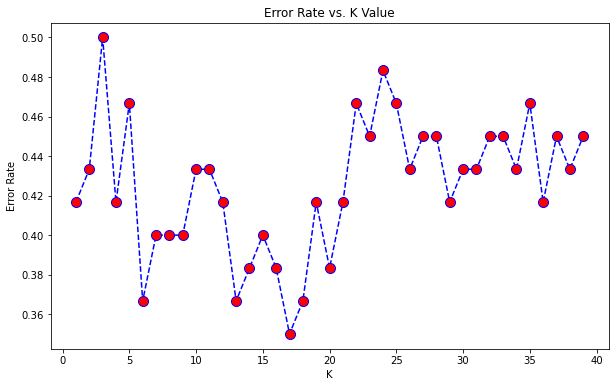

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [15]:
print(confusion_matrix(y_test, pred))

[[32  3]
 [18  7]]


In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Female       0.64      0.91      0.75        35
        Male       0.70      0.28      0.40        25

    accuracy                           0.65        60
   macro avg       0.67      0.60      0.58        60
weighted avg       0.67      0.65      0.61        60

